Initial State:
1 2 3
4 0 5
6 7 8
--------
Depth: 0
1 2 3
4 0 5
6 7 8
--------
Depth: 1
1 2 3
4 7 5
6 0 8
--------
Depth: 2
1 2 3
4 7 5
6 8 0
--------
Depth: 2
1 2 3
4 7 5
0 6 8
--------
Depth: 1
1 0 3
4 2 5
6 7 8
--------
Depth: 2
1 3 0
4 2 5
6 7 8
--------
Depth: 2
0 1 3
4 2 5
6 7 8
--------
Depth: 1
1 2 3
4 5 0
6 7 8
--------
Depth: 2
1 2 3
4 5 8
6 7 0
--------
Depth: 2
1 2 0
4 5 3
6 7 8
--------
Depth: 1
1 2 3
0 4 5
6 7 8
--------
Depth: 2
1 2 3
6 4 5
0 7 8
--------
Depth: 2
0 2 3
1 4 5
6 7 8
--------
No solution found within depth 2


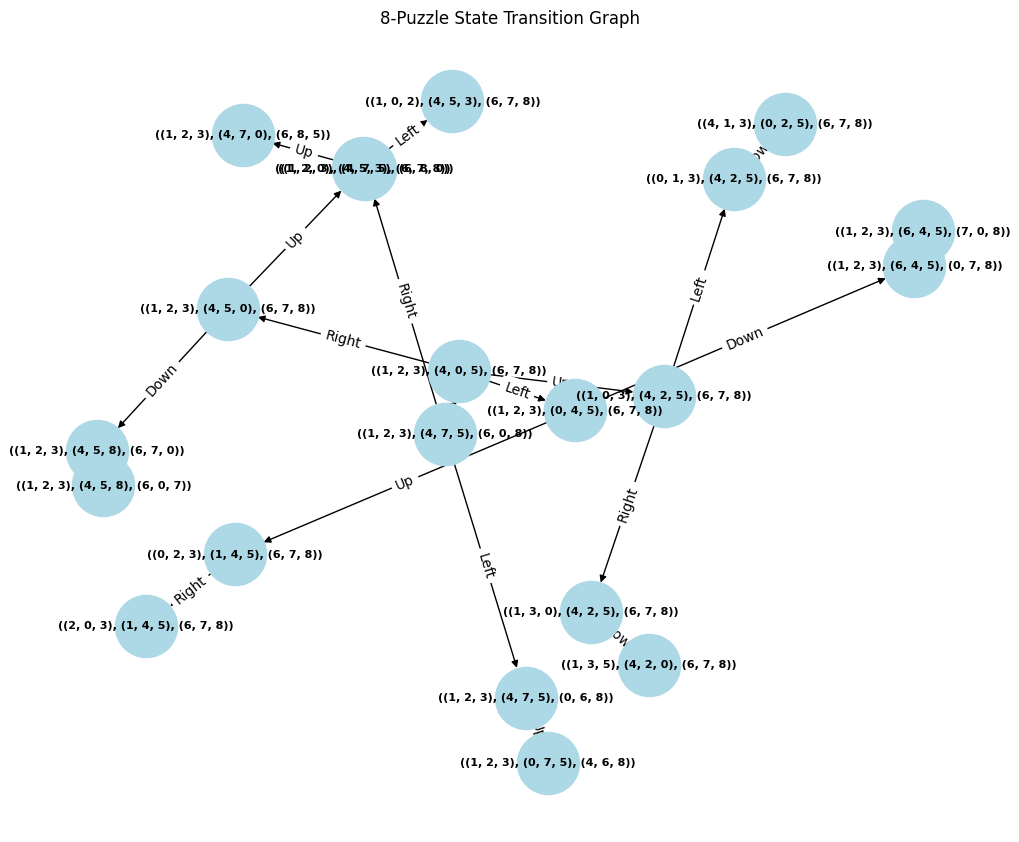

In [20]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

# Define the dimensions of the puzzle
N = 3

# Structure to store a state of the puzzle
class PuzzleState:
    def __init__(self, board, x, y, depth, path=None):
        self.board = board  # Current puzzle board
        self.x = x  # X-coordinate of the empty tile
        self.y = y  # Y-coordinate of the empty tile
        self.depth = depth  # Depth of the current state
        self.path = path if path else []  # Path taken to reach this state

# Possible moves: Left, Right, Up, Down
row = [0, 0, -1, 1]
col = [-1, 1, 0, 0]
move_names = ["Left", "Right", "Up", "Down"]

# Function to check if a given state is the goal state
def is_goal_state(board):
    goal = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
    return board == goal

# Function to check if a move is valid
def is_valid(x, y):
    return 0 <= x < N and 0 <= y < N

# Function to print the board
def print_board(board):
    for row in board:
        print(' '.join(map(str, row)))
    print("--------")

# Depth-First Search to solve the 8-puzzle problem
def solve_puzzle_dfs(start, x, y):
    stack = []  # Stack for DFS
    visited = set()  # Set to track visited states
    solutions = []  # Store up to 3 solutions
    state_graph = nx.DiGraph()  # Directed graph to store state transitions

    # Add the initial state to the stack and mark it as visited
    stack.append(PuzzleState(start, x, y, 0, []))
    visited.add(tuple(map(tuple, start)))

    # Loop for DFS
    while stack and len(solutions) < 3:  # Stop after finding 3 solutions
        curr = stack.pop()

        # Limit search depth to 2
        if curr.depth > 2:
            continue

        # Print the current board
        print(f'Depth: {curr.depth}')
        print_board(curr.board)

        # Add the current board as a node in the graph
        state_tuple = tuple(map(tuple, curr.board))
        state_graph.add_node(state_tuple, label=f"Depth: {curr.depth}")

        # Check if goal state is reached
        if is_goal_state(curr.board):
            solutions.append(curr)
            print(f'Goal state reached at depth {curr.depth}')
            print("Path to solution:", " -> ".join(curr.path))
            continue

        # Explore possible moves
        for i in range(4):
            new_x = curr.x + row[i]
            new_y = curr.y + col[i]

            if is_valid(new_x, new_y):
                new_board = [row[:] for row in curr.board]  # Copy the board
                # Swap the tiles
                new_board[curr.x][curr.y], new_board[new_x][new_y] = new_board[new_x][new_y], new_board[curr.x][curr.y]

                # If this state has not been visited before, push to stack
                board_tuple = tuple(map(tuple, new_board))
                if board_tuple not in visited:
                    visited.add(board_tuple)
                    stack.append(PuzzleState(new_board, new_x, new_y, curr.depth + 1, curr.path + [move_names[i]]))

                    # Add an edge in the graph representing this move
                    state_graph.add_edge(state_tuple, board_tuple, label=move_names[i])

    # Display the final graph
    if not solutions:
        print('No solution found within depth 2')

    # Draw the graph with node labels
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(state_graph)  # Position nodes using spring layout
    labels = nx.get_edge_attributes(state_graph, 'label')
    nx.draw(state_graph, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=8, font_weight='bold')
    nx.draw_networkx_edge_labels(state_graph, pos, edge_labels=labels)
    plt.title("8-Puzzle State Transition Graph")
    plt.show()

# Driver Code
if __name__ == '__main__':
    start = [[1, 2, 3], [4, 0, 5], [6, 7, 8]]  # Initial state
    x, y = 1, 1  # Position of the empty tile

    print('Initial State:')
    print_board(start)

    solve_puzzle_dfs(start, x, y)